The Labeled Faces in the Wild face recognition dataset, popular fetch_lfw_people.


This dataset is a collection of JPEG pictures of famous people collected over the internet.

I want to try out neural networks for the classification.

In [1]:
from sklearn.datasets import fetch_lfw_people

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow.keras.utils.np_utils'

In [3]:
people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

In [4]:
print("How many classes:", len(people.target_names), "\n")
for name in people.target_names:
    print(name)

How many classes: 19 

Ariel Sharon
Arnold Schwarzenegger
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Hugo Chavez
Jacques Chirac
Jean Chretien
Jennifer Capriati
John Ashcroft
Junichiro Koizumi
Laura Bush
Lleyton Hewitt
Luiz Inacio Lula da Silva
Serena Williams
Tony Blair
Vladimir Putin


In [5]:
people.data.dtype

dtype('float32')

In [6]:
people.images.shape

(1867, 50, 37)

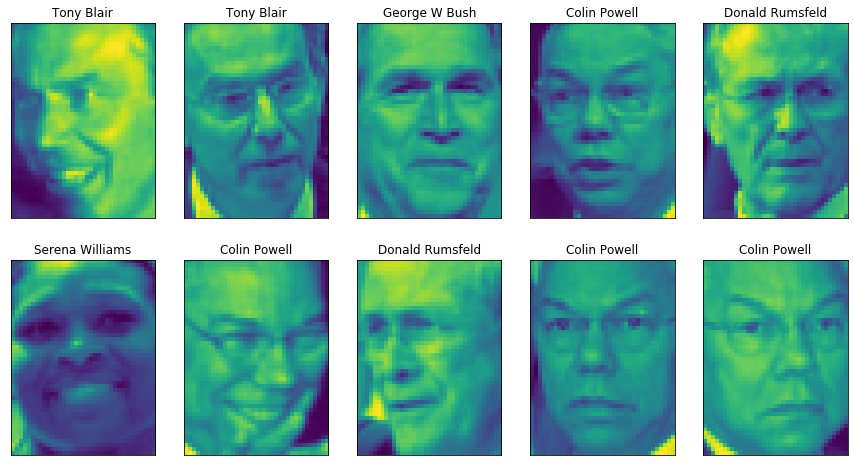

In [7]:
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [8]:
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Ariel Sharon               77 Arnold Schwarzenegger      42 Colin Powell              236 
Donald Rumsfeld           121 George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Hugo Chavez                71 Jacques Chirac             52 
Jean Chretien              55 Jennifer Capriati          42 John Ashcroft              53 
Junichiro Koizumi          60 Laura Bush                 41 Lleyton Hewitt             41 
Luiz Inacio Lula da Silva  48 Serena Williams            52 Tony Blair                144 
Vladimir Putin             49 

To make the data less skewed, we will only take up to 50 images of each person.

In [9]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
# X_people = X_people / 255.

In [11]:
fac = 0.99 / 255
X_people = np.asfarray(X_people) * fac + 0.01

In [12]:
unique_elements, counts_elements = np.unique(y_people, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
 [50 42 50 50 50 50 44 50 50 50 42 50 50 41 41 48 50 50 49]]


In [21]:
y_categ_labels = tf.keras.utils.to_categorical(y_people, num_classes=19)

In [25]:
y_categ_labels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_categ_labels[y_categ_labels == 0] = 0.01
y_categ_labels[y_categ_labels == 1] = 0.99

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)

In [47]:
X_train.shape

(680, 1850)

In [55]:
model_0 = keras.models.Sequential([
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(19, activation="softmax")
])

In [56]:
model_0.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=["accuracy"])

In [59]:
peeps = model_0.fit(X_train, y_train, epochs=100)

Train on 680 samples
Epoch 1/100
680/680 [==============================] - 1s 792us/sample - loss: 0.7327 - accuracy: 0.7750
Epoch 2/100
680/680 [==============================] - 1s 739us/sample - loss: 0.6440 - accuracy: 0.8088
Epoch 3/100
680/680 [==============================] - 1s 793us/sample - loss: 0.5957 - accuracy: 0.8088
Epoch 4/100
680/680 [==============================] - 0s 716us/sample - loss: 0.5047 - accuracy: 0.8618
Epoch 5/100
680/680 [==============================] - 1s 773us/sample - loss: 0.4137 - accuracy: 0.8824
Epoch 6/100
680/680 [==============================] - 1s 803us/sample - loss: 0.5324 - accuracy: 0.8235
Epoch 7/100
680/680 [==============================] - 1s 750us/sample - loss: 0.5853 - accuracy: 0.8206
Epoch 8/100
680/680 [==============================] - 1s 782us/sample - loss: 0.5555 - accuracy: 0.8353
Epoch 9/100
680/680 [==============================] - 1s 814us/sample - loss: 0.7216 - accuracy: 0.8015
Epoch 10/100
680/680 [============

680/680 [==============================] - 1s 933us/sample - loss: 0.0207 - accuracy: 1.0000
Epoch 78/100
680/680 [==============================] - 1s 790us/sample - loss: 0.0190 - accuracy: 1.0000
Epoch 79/100
680/680 [==============================] - 1s 755us/sample - loss: 0.0155 - accuracy: 1.0000
Epoch 80/100
680/680 [==============================] - 1s 799us/sample - loss: 0.0149 - accuracy: 1.0000
Epoch 81/100
680/680 [==============================] - 1s 811us/sample - loss: 0.0141 - accuracy: 1.0000
Epoch 82/100
680/680 [==============================] - 1s 827us/sample - loss: 0.0131 - accuracy: 1.0000
Epoch 83/100
680/680 [==============================] - 1s 744us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 84/100
680/680 [==============================] - 1s 781us/sample - loss: 0.0114 - accuracy: 1.0000
Epoch 85/100
680/680 [==============================] - 0s 731us/sample - loss: 0.0116 - accuracy: 1.0000
Epoch 86/100
680/680 [==============================] - 1s 

In [60]:
model_0.evaluate(X_test, y_test)

227/227 [==============================] - 0s 528us/sample - loss: 2.2692 - accuracy: 0.6388


[2.2691601643478294, 0.6387665]